

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>




<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Avançamos bastante com os ajustes, mas ainda temos alguns pontos pendentes. Procure por 'v2' para encontrá-los com mais facilidade.

Estamos quase lá! Vamos juntos até o fim.
</div>


# Projeto de Teste A/B

Você recebeu uma tarefa analítica de uma loja online internacional. Seu predecessor não conseguiu completá-la: ele lançou um teste A/B e depois desistiu (para começar uma fazenda de melancias no Tocantins). Ele deixou apenas as especificações técnicas e resultado dos testes.

## Etapa 1- Importação

In [1]:
#importando
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
#dados
marketing = pd.read_csv('/datasets/ab_project_marketing_events_us.csv') #calendario eventos de marketing
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv') #novos usuários que se cadastraram entre 7 a 21 de dezembro de 2020
events = pd.read_csv('/datasets/final_ab_events_upd_us.csv') #eventos dos novos usuários
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv') #tabela contendo os participantes dos testes

###### Objetivos do Estudo
- Analisar e estudar os dados fornecidos, além de avaliar os resultados do teste A/B, descrevendo conlclusoes

###### Exploração dos dados

In [3]:
#verificando dados
print(marketing.head())
print(marketing.info())
print()
print(new_users.head())
print(new_users.info())
print()
print(events.head())
print(events.info())
print()
print(participants.head())
print(participants.info())

                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None

            user_id  first_date     region   device
0  D72A72121175D8BE  2020-

In [4]:
#limpando 'marketing'
marketing['start_dt'] = pd.to_datetime(marketing['start_dt'], errors='coerce') #transformando tipo de dado
marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'], errors='coerce')#transformando tipo de dado
marketing['name'] = marketing['name'].str.lower() #letras minúsculas
marketing['regions'] = marketing['regions'].str.lower() #letras minúsculas

#valores duplicados e ausentes
marketing_nulls = marketing.isnull().sum()
marketing_duplicates = marketing.duplicated().sum()

#limpando'new_users'
new_users['first_date'] = pd.to_datetime(new_users['first_date'], errors='coerce') #transformando tipo de dado
new_users['region'] = new_users['region'].str.lower() #letras minúsculas
new_users['device'] = new_users['device'].str.lower() #letras minúsculas

#valores duplicados e ausentes
new_users_nulls = new_users.isnull().sum()
new_users_duplicates = new_users.duplicated().sum()

#limpando 'events'
events['event_dt'] = pd.to_datetime(events['event_dt'], errors='coerce') #transformando tipo de dado
events['event_name'] = events['event_name'].str.lower() #letras minúsculas

#valores duplicados e ausentes
events_nulls = events.isnull().sum()
events_duplicates = events.duplicated().sum()

#limpando 'participants'
participants['group'] = participants['group'].str.lower() #letras minúsculas
participants['ab_test'] = participants['ab_test'].str.lower() #letras minúsculas

#valores duplicados e ausentes
participants_nulls = participants.isnull().sum()
participants_duplicates = participants.duplicated().sum()

In [5]:
# Preencher valores ausentes em 'details' com 0
events['details'] = events['details'].fillna(0)

# Verificar a atualização
print(events.isnull().sum())

user_id       0
event_dt      0
event_name    0
details       0
dtype: int64


In [6]:
#verificando dados
print(marketing.head())
print(marketing.info())
print()
print(new_users.head())
print(new_users.info())
print()
print(events.head())
print(events.info())
print()
print(participants.head())
print(participants.info())

                           name                   regions   start_dt  \
0      christmas&new year promo             eu, n.america 2020-12-25   
1  st. valentine's day giveaway  eu, cis, apac, n.america 2020-02-14   
2        st. patric's day promo             eu, n.america 2020-03-17   
3                  easter promo  eu, cis, apac, n.america 2020-04-12   
4             4th of july promo                 n.america 2020-07-04   

   finish_dt  
0 2021-01-03  
1 2020-02-16  
2 2020-03-19  
3 2020-04-19  
4 2020-07-11  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes
None

            user_id fir

- Podemos concluir que foi identificado valores ausentes na coluna de 'details' no dataframe Events.
- Corrimos o tipos dos dados da coluna 'start_dt' e 'finish_dt' para datetime.
- Trasformamos o nome das colunas para letras minusculas.
- Não foi identificado colunas com valores ausentes.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Importante elaborar uma conclusão sobre o que foi observado em relação a consistência dos dados. Devemos focar em valores duplicados, atípicos, ausentes e com tipos errôneos (que podem ser checados por meio dos métodos info(), head() e describe())

</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>


## Análise exploratoria dos Dados

###### Estudo da Conversão em Diferentes etapas do Funil

In [7]:
#eventos de cada tipo para verificar as etapas do funil
funnel_events = events['event_name'].value_counts()
print(funnel_events)

print()

#percentual de usuários que completam cada etapa do funil
unique_users = events.groupby('event_name')['user_id'].nunique()
total_users = events['user_id'].nunique()
conversion_rate = (unique_users / total_users) * 100
print(conversion_rate)

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

event_name
login           99.988076
product_cart    32.850110
product_page    66.315180
purchase        33.333901
Name: user_id, dtype: float64


- Esses dados vão indicar a taxa de conversão em cada fase do funil, o que ajuda a entender em qual etapa os usuários deixam o processo.

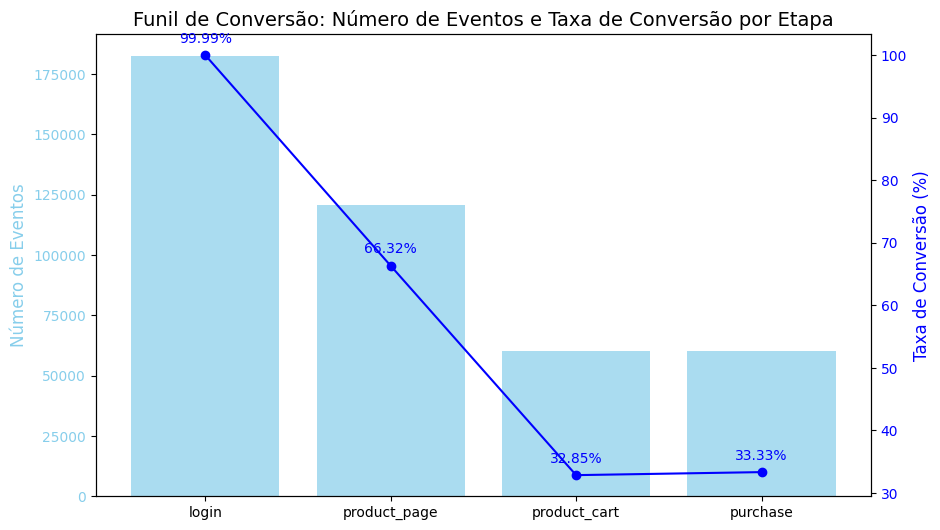

In [8]:
#ordenados na sequência do funil
funnel_events_ordered = funnel_events[['login', 'product_page', 'product_cart', 'purchase']]
conversion_rate_ordered = conversion_rate[['login', 'product_page', 'product_cart', 'purchase']]

#gráfico de funil de conversão
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(funnel_events_ordered.index, funnel_events_ordered.values, color='skyblue', alpha=0.7, label='Número de Eventos')
ax1.set_ylabel('Número de Eventos', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Funil de Conversão: Número de Eventos e Taxa de Conversão por Etapa', fontsize=14)

#plotando a taxa de conversão
ax2 = ax1.twinx()
ax2.plot(conversion_rate_ordered.index, conversion_rate_ordered.values, color='blue', marker='o', label='Taxa de Conversão')
ax2.set_ylabel('Taxa de Conversão (%)', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

#exibindo as porcentagens de conversão acima dos pontos da linha
for i, v in enumerate(conversion_rate_ordered.values):
    ax2.text(i, v + 2, f"{v:.2f}%", ha='center', color='blue', fontsize=10)

plt.show()

- Com o gráfico, podemos visualizar o fluxo em cada etapa do funil de conversão.
- A maior queda ocorre na transição entre "login" e "product_page," indicando que uma análise mais profunda desse ponto poderia ajudar a entender o que impede os usuários de explorar produtos.
- Considerando a baixa taxa de usuários que visualizam páginas de produtos, poderia ser interessante melhorar a navegação e a apresentação dos produtos logo após o login.
- Com uma taxa de conversão de apenas 32.85% de usuários visualizando produtos para aqueles que adicionam ao carrinho, pode ser útil analisar como tornar o processo de adição ao carrinho mais intuitivo.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

BErnardo, seria importante exibir esse resultado em ordem e com um gráfico e conclusão sobre o comprotamento ilustrado.
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Ótimo trabalho, ficou super claro!
</div>


###### Distribução do Número de Eventos por Usuários

In [9]:
#eventos por usuário
events_per_user = events.groupby('user_id')['event_name'].count()

#estatísticas gerais de eventos por usuário
print(events_per_user.describe())
print(events_per_user)

count    58703.000000
mean         7.218728
std          4.122609
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         36.000000
Name: event_name, dtype: float64
user_id
0001710F4DDB1D1B     6
000199F1887AE5E6    16
0002499E372175C7     9
0002CE61FF2C4011    12
000456437D0EFFE1     4
                    ..
FFF7A7BAF44FE9B4     2
FFF8FDBE2FE99C91    12
FFF91B6C5431F375     8
FFFAB034A09DCC28     4
FFFFE36C0F6E92DF     9
Name: event_name, Length: 58703, dtype: int64


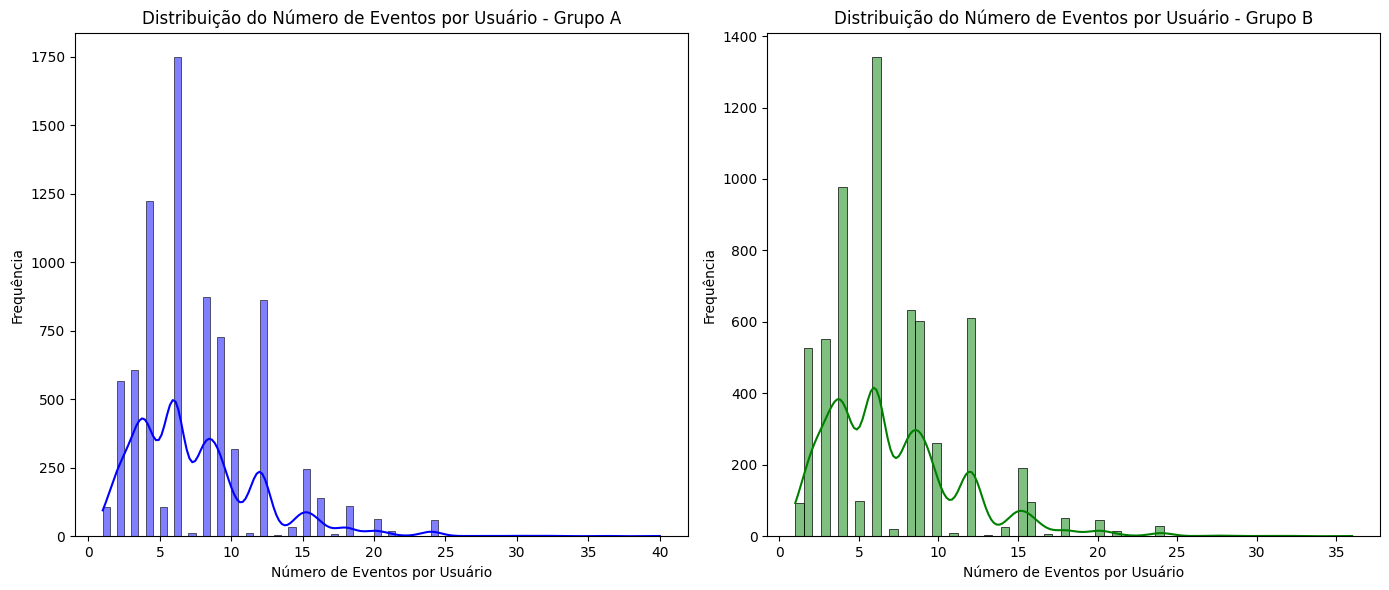

(count    7874.000000
 mean        7.455550
 std         4.475159
 min         1.000000
 25%         4.000000
 50%         6.000000
 75%         9.000000
 max        40.000000
 Name: event_name, dtype: float64,
 count    6205.000000
 mean        7.112490
 std         4.246201
 min         1.000000
 25%         4.000000
 50%         6.000000
 75%         9.000000
 max        36.000000
 Name: event_name, dtype: float64)

In [19]:
#informações de grupo aos dados de eventos
events_with_group = events.merge(participants, on='user_id', how='inner')

#número de eventos por usuário em cada grupo
events_per_user_A = events_with_group[events_with_group['group'] == 'a'].groupby('user_id')['event_name'].count()
events_per_user_B = events_with_group[events_with_group['group'] == 'b'].groupby('user_id')['event_name'].count()

#estatísticas descritivas para cada grupo
stats_A = events_per_user_A.describe()
stats_B = events_per_user_B.describe()

#distribuição para cada grupo
plt.figure(figsize=(14, 6))

#grupo A
plt.subplot(1, 2, 1)
sns.histplot(events_per_user_A, kde=True, color='blue')
plt.title("Distribuição do Número de Eventos por Usuário - Grupo A")
plt.xlabel("Número de Eventos por Usuário")
plt.ylabel("Frequência")

#grupo B
plt.subplot(1, 2, 2)
sns.histplot(events_per_user_B, kde=True, color='green')
plt.title("Distribuição do Número de Eventos por Usuário - Grupo B")
plt.xlabel("Número de Eventos por Usuário")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

stats_A, stats_B

Esse gráfico mostra a distribuição do número de eventos por usuário:

-Distribuição Geral:

- Ambos os grupos têm uma distribuição semelhante, com a maioria dos usuários realizando entre 1 e 10 eventos.
- Há uma concentração de usuários com cerca de 5 a 10 eventos em ambos os grupos, sugerindo que o padrão de engajamento dos usuários não varia drasticamente entre os grupos.

Média e Mediana:
- O grupo A apresenta uma média de 7,46 eventos por usuário, enquanto o grupo B possui uma média ligeiramente menor, de 7,11 eventos por usuário. Ambas as medianas estão em torno de 6 eventos.

Conclusão:

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Lembre-se de comparar os grupos nessa sessão para entender se são homogêneos em relação ao # de eventos por usuário.

</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Esse ponto acabou ficando em aberto, Bernardo.
    
Devemos fazer um estudo parecido com o que você fez mas em cada um dos grupos para entender se a distribuição deles é equivalente.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v3</strong>

Valeu pelo ajuste! Ponto endereçado.
</div>


###### Presença de Usuários em ambas as Amostras

In [12]:
#usuários por grupo na tabela de participantes
user_counts_group = participants['group'].value_counts()
print(user_counts_group)

#verificar presença de usuários nos eventos para cada grupo
participants_in_events = events.merge(participants, on='user_id', how='inner')
group_user_counts = participants_in_events['group'].value_counts()
print(group_user_counts)

a    8214
b    6311
Name: group, dtype: int64
a    58705
b    44133
Name: group, dtype: int64


In [13]:
duplicated_users = participants[participants.duplicated(subset=['user_id'], keep=False)]

#mostrar quantos e quais usuários estão duplicados entre os grupos
duplicated_users_info = duplicated_users.groupby('user_id')['group'].nunique()
duplicated_user_count = duplicated_users_info[duplicated_users_info > 1].count()
duplicated_users_list = duplicated_users_info[duplicated_users_info > 1].index.tolist()

duplicated_user_count, duplicated_users_list[:10]

(441,
 ['0082295A41A867B5',
  '00E68F103C66C1F7',
  '02313B9E82255F47',
  '04F2CF340B4F3822',
  '051D59BC38C3B3AA',
  '067D05BD30F04F2E',
  '08589AA89496453B',
  '0980BF24051C806A',
  '0A0141A363E2E051',
  '0ADFFFE9C0D60092'])

In [14]:
#remover os usuários duplicados do dataframe `participants`
participants_clean = participants[~participants['user_id'].isin(duplicated_users_list)]

# Contar novamente os usuários em cada grupo para confirmar a remoção
user_counts_group_clean = participants_clean['group'].value_counts()
print(user_counts_group_clean)

a    7773
b    5870
Name: group, dtype: int64


- Verificamos a presença de usuários em ambas amostras, o que pode atrapalhar a análise. Logo, identificamos esses usuários e realizamos a remoção deles. E depois de executar este código, temos a contagem de usuários atualizada em cada grupo (a e b) sem sobreposição, permitindo prosseguir com a análise A/B de maneira mais precisa e confiável.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Importante descrever se há clientes presentes em ambas as amostras e se for o caso removê-los.
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Importante descrever o que foi feito nessa sessão e a qual conclusão chegamos.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v3</strong>

Valeu pelo ajuste!
</div>


###### Distribuição de eventos ao longo do dia

In [15]:
#data dos eventos
events['event_date'] = events['event_dt'].dt.date

#eventos por dia
events_per_day = events.groupby('event_date')['event_name'].count()
print(events_per_day.head())

event_date
2020-12-07    11385
2020-12-08    12547
2020-12-09    12122
2020-12-10    14077
2020-12-11    13864
Name: event_name, dtype: int64


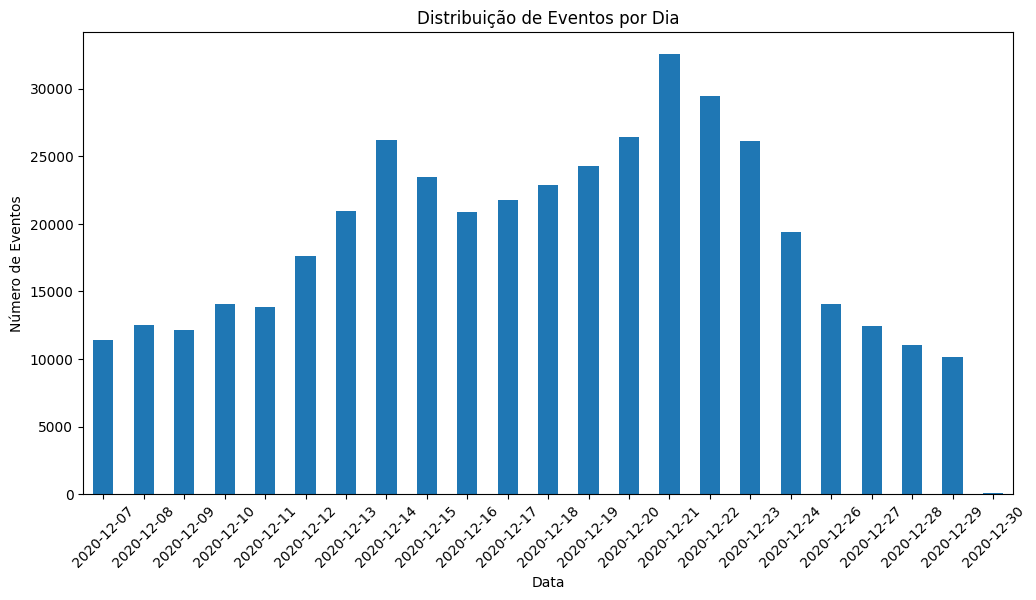

In [16]:
plt.figure(figsize=(12, 6))
events_per_day.plot(kind='bar')
plt.title("Distribuição de Eventos por Dia")
plt.xlabel("Data")
plt.ylabel("Número de Eventos")
plt.xticks(rotation=45)
plt.show()

- Essa análise pode revelar datas específicas com um volume anômalo de eventos, ajudando a considerar se esses dias podem influenciar o teste.

Distribuição diária de eventos ao longo de dezembro:
- Este gráfico mostra um comportamento de pico sazonal associado ao período de festas. Essa análise pode ajudar a planejar estratégias de marketing e prever o engajamento do usuário em várias épocas do ano. Além disso, a queda após o pico sugere que o interesse dos usuários é temporário, provavelmente ligado ao contexto das festividades e promoções de fim de ano.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho verificando o # de eventos em função dos dias!
</div>



###### Particularidade nos Dados

Alguns detalhes observados são:
- Valores ausentes: A coluna details possuía um grande número de valores ausentes que foram preenchidos com 0. É importante saber que esses valores podem influenciar métricas de eventos que envolvem details.
- Possíveis tendências sazonais: Se identificarmos picos de eventos em datas específicas (por exemplo, devido a campanhas de marketing), esses dias podem ser tratados de forma diferente para evitar que influenciem o teste A/B.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Particularidades relevantes foram apresentadas.
</div>



###### Avalie os resultados do teste A/B:

Avaliar as taxas de conversão entre os grupos A e B, verificando se há uma diferença significativa entre as proporções de conversão.

In [17]:
# Filtrar o evento de conversão desejado (exemplo: 'purchase')
conversion_event = 'purchase'
conversions = participants_in_events[participants_in_events['event_name'] == conversion_event]

# Contagem de usuários únicos que converteram em cada grupo
conversions_A = conversions[conversions['group'] == 'a']['user_id'].nunique()
conversions_B = conversions[conversions['group'] == 'b']['user_id'].nunique()

# Total de usuários por grupo
total_users_A = participants[participants['group'] == 'a'].shape[0]
total_users_B = participants[participants['group'] == 'b'].shape[0]

# Taxas de conversão para cada grupo
conversion_rate_A = conversions_A / total_users_A
conversion_rate_B = conversions_B / total_users_B

print(f"Conversão Grupo A: {conversion_rate_A:.4f}")
print(f"Conversão Grupo B: {conversion_rate_B:.4f}")

# Teste Z para verificar diferença estatística entre as proporções
counts = [conversions_A, conversions_B]
totals = [total_users_A, total_users_B]
z_stat, p_value = proportions_ztest(counts, totals)

# Resultados do teste Z
print(f"Estatística Z: {z_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

# Interpretação dos resultados
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença estatisticamente significativa entre as taxas de conversão dos grupos A e B.")
else:
    print("Falhamos em rejeitar a hipótese nula: não há diferença estatisticamente significativa entre as taxas de conversão dos grupos A e B.")

Conversão Grupo A: 0.3265
Conversão Grupo B: 0.3182
Estatística Z: 1.0657
P-valor: 0.2866
Falhamos em rejeitar a hipótese nula: não há diferença estatisticamente significativa entre as taxas de conversão dos grupos A e B.


In [18]:
#eventos do funil
funnel_steps = ['login', 'product_page', 'product_cart', 'purchase']

#iterar sobre cada etapa do funil
for step in funnel_steps:
    #filtrar o evento atual do funil
    conversions_step = participants_in_events[participants_in_events['event_name'] == step]
    
    #contagem de usuários únicos que converteram
    conversions_A_step = conversions_step[conversions_step['group'] == 'a']['user_id'].nunique()
    conversions_B_step = conversions_step[conversions_step['group'] == 'b']['user_id'].nunique()
    
    #taxas de conversão para cada grupo na etapa atual
    conversion_rate_A_step = conversions_A_step / total_users_A
    conversion_rate_B_step = conversions_B_step / total_users_B
    
    #teste Z para verificar diferença estatística entre as proporções na etapa atual
    counts_step = [conversions_A_step, conversions_B_step]
    totals_step = [total_users_A, total_users_B]
    z_stat_step, p_value_step = proportions_ztest(counts_step, totals_step)
    
    #resultados do teste Z
    print(f"\nEtapa: {step}")
    print(f"Conversão Grupo A: {conversion_rate_A_step:.4f}")
    print(f"Conversão Grupo B: {conversion_rate_B_step:.4f}")
    print(f"Estatística Z: {z_stat_step:.4f}")
    print(f"P-valor: {p_value_step:.4f}")
    
    if p_value_step < alpha:
        print("Rejeitamos a hipótese nula: há uma diferença estatisticamente significativa entre as taxas de conversão dos grupos A e B.")
    else:
        print("Falhamos em rejeitar a hipótese nula: não há diferença estatisticamente significativa entre as taxas de conversão dos grupos A e B.")


Etapa: login
Conversão Grupo A: 0.9585
Conversão Grupo B: 0.9830
Estatística Z: -8.4863
P-valor: 0.0000
Rejeitamos a hipótese nula: há uma diferença estatisticamente significativa entre as taxas de conversão dos grupos A e B.

Etapa: product_page
Conversão Grupo A: 0.6340
Conversão Grupo B: 0.6316
Estatística Z: 0.3029
P-valor: 0.7620
Falhamos em rejeitar a hipótese nula: não há diferença estatisticamente significativa entre as taxas de conversão dos grupos A e B.

Etapa: product_cart
Conversão Grupo A: 0.3023
Conversão Grupo B: 0.3228
Estatística Z: -2.6428
P-valor: 0.0082
Rejeitamos a hipótese nula: há uma diferença estatisticamente significativa entre as taxas de conversão dos grupos A e B.

Etapa: purchase
Conversão Grupo A: 0.3265
Conversão Grupo B: 0.3182
Estatística Z: 1.0657
P-valor: 0.2866
Falhamos em rejeitar a hipótese nula: não há diferença estatisticamente significativa entre as taxas de conversão dos grupos A e B.


###### Conclusão:
Taxas de Conversão:
Login
- Grupo A: 95.85%
- Grupo B: 98.30%

Product Page
- Grupo A: 63.40%
- Grupo B: 63.16%

Product Cart
- Grupo A: 30.23%
- Grupo B: 32.28%

Purchase
- Grupo A: 32.65%
- Grupo B: 31.82%

Essas taxas mostram a proporção de usuários que passaram por cada etapa do funil. Importante notar que a taxa de conversão para o grupo B é ligeiramente superior nas etapas de "Login" e "Product Cart", enquanto é praticamente igual para "Product Page" e "Purchase".

Teste Estatístico:
Login
- Estatística Z: -8.4863
- P-valor: 0.0000
- Conclusão: O grupo B apresentou uma taxa de login mais alta, sugerindo que usuários desse grupo tiveram mais facilidade ou incentivo para realizar login.

Product Page
- Estatística Z: 0.3029
- P-valor: 0.7620
- Conclusão: A exposição ao teste não afetou a taxa de visualização de página de produto entre os grupos.

Product Cart
- Estatística Z: -2.6428
- P-valor: 0.0082
- Conclusão: O grupo B tem uma taxa ligeiramente maior de usuários que adicionaram produtos ao carrinho, o que pode indicar uma leve preferência por um design ou uma funcionalidade testada para o grupo B que influencia nessa ação.

Purchase
- Estatística Z: 1.0657
- P-valor: 0.2866
- Conclusão: Isso sugere que, apesar das diferenças nas etapas iniciais, ambos os grupos têm taxas de conversão similares na fase de compra.

Hipótese Nula:
- Como o p-valor é superior a 0.05, falhamos em rejeitar a hipótese nula. Isso significa que não há evidência estatística suficiente para dizer que existe uma diferença significativa entre as taxas de conversão dos grupos A e B.

Interpretação:

- Com base nesses resultados, a intervenção ou mudança testada não trouxe uma melhora significativa na conversão.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

    
Bernardo, aqui você precisa executar o teste para proporções de cada etapa do funil, conforme apresentado no enunciado do projeto.
    
No entanto a sua estrutura está perfeita! Vamos reproduzi-las nas demais etapas.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Excelente trabalho, Bernardo! Testes e conclusões adequados!
</div>
